In [83]:
# http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
from matplotlib.pyplot import subplots,close

def animate_generator(generator, frames=200, interval=20):
    fig,ax = subplots(1,1)
    im = ax.imshow(next(generator),interpolation='nearest',animated=True)
    
    def animate(i):
        im.set_data(next(generator))
        return im,
    # call the animator. blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, animate,
                                   frames=frames, interval=interval)#, blit=True);

    return anim.to_html5_video()

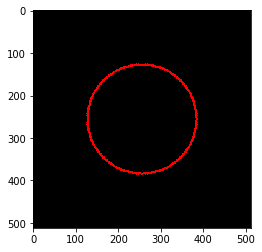

In [89]:
dims=(512,512, 3)
M = np.zeros(dims,dtype=np.uint8)

def circle():
    r = 128
    x0, y0 = 256, 256
    theta = 0
    while 1:
        theta += 2 * np.pi / 200
        pt = [x0 + r * np.cos(theta), y0 + r * np.sin(theta)]
        pt[0], pt[1] = int(pt[0]), int(pt[1])
        cv2.circle(M, tuple(pt), 3, (255, 0, 0), thickness=-1)
        yield M

def randomwalk(n=1,sigma=10,alpha=0.95,seed=1):
    """ A simple random walk with memory """
    r,c = dims
    gen = np.random.RandomState(seed)
    pos = gen.rand(2,n)*((r,),(c,))
    old_delta = gen.randn(2,n)*sigma
    while 1:
        delta = (1.-alpha)*gen.randn(2,n)*sigma + alpha*old_delta
        pos += delta
        for ri,ci in pos.T:
            if not (0. <= ri < r) : ri = abs(ri % r)
            if not (0. <= ci < c) : ci = abs(ci % c)
            ri, ci = int(ri), int(ci)
            M[ri,ci] += 1
        old_delta = delta
        yield M
        

HTML(animate_generator(circle()))

In [14]:
?animation.FuncAnimation